# PRACTICE 2
[Dataset](https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w) : Apartment Price in Victoria. 

**Latar Belakang** : Dataset menyediakan area hidup dan status konservasi. Terdapat 218 pengamatan dan 16 variabel.

**Objektif** : Dengan kasus : Tony yang berprofesi sebagai broker ingin meramalkan harga apartemen di Victoria berdasarkan lingkungan ruang keluarga dan status konservasi apartemen. Tentukan model terbaik untuk memprediksi dan mendefinisikan kembali variabel konservasi baru dalam 3 level : <br> 
- Level A = 1A
- Level B = 2A
- Level C = 2B dan 3A

Berdasarkan kasus maka dapat menentukan model terbaik dengan menggunakan regresi.
****


The steps of this project that we will work through are as follows :
1. **Load Data** : *Import Dataset*
2. **EDA** : *Create summary of the dataset, with python function. (mean, median, modus, max, min, range)*
3. **Data Visualization** : *Create any kind suitable plot of dataset, it will provide a lot of insight into the problem*
4. **Variable Selection** : *Choose the variable and its reason*
5. **Modelling (Regression)** : *Create models using Regression*
6. **Accuracy of Error** : *Calculate the Error using the helper function from the library, from dataset only*

# 1. Load Data

In [1]:
# Package Load Data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('victoria.csv')
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [8]:
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [11]:
# Dimensi Data
df.shape

(218, 16)

#### Mempersiapkan Data

In [18]:
# Tipe Data
df.dtypes

row.labels         int64
totalprice         int64
area               int64
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage             int64
elevator           int64
streetcategory    object
heating           object
tras               int64
dtype: object

> Dikarenakan terdapat tipe data yang tidak sesuai dengan datanya, maka dapat dilakukan singkronisasi data agar analsis yang diperoleh tidak bias.

In [19]:
# Cleansing Data
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [31]:
# Convert Data Numeric
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

In [33]:
# Menghapus Kolom yang Tidak Digunakan
df=df.drop(['row.labels'],axis=1)

# 2. EDA
*Exploratory Data Analysis* digunakan untuk dapat mengetahui karakteristik awal data yang akan digunakan. EDA yang akan dilakukan yaitu dengan menggunakan statistika deskriptif dan dengan menggunakan visualisasi data (Bagian *Data Visualization*)

In [34]:
df.describe()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,2.180000e+02,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2.885435e+05,5.718657e+09,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,1.289723e+05,3.455007e+09,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.550000e+05,5.300000e+01,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,2.300000e+05,1.187250e+09,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,2.700000e+05,7.118500e+09,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,3.297500e+05,8.542750e+09,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,1.889822e+06,9.992000e+09,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


> Menggunakan EDA maka dapat diketahui karakteristik dari data yang akan dianalisis.
Berdasarkan Statistika Deskriptif pada 218 data tersebut, maka dapat diketahui bahwa :
1. *Harga Apartemen* di Victoria yang tertinggi yaitu 1.889.822 dan yang terendah yaitu sebesar 155.000. Sedangkan rata-rata harga apartemen di Victoria adalah sebesar 288.543.
2. *Area Apartemen* di Victoria yang terluas yaitu 9.92 sedangkan yang terendah yaitu 5.3 dengan rata-rata luas apartemen yaitu sebesar 5.7.
3. *Usia Apartemen* menunjukkan usia tertinggi yaitu 118 tahun dan yang terkecil yaitu 1 tahun dengan rata-rata 19 tahun.
4. *Lantai Apartemen* yang paling banyak ditempati yaitu lantai 7 dengan yang paling sedikit lantai yang ditempati yaitu lantai 1, dengan rata-rata lantai yang ditempati yaitu lantai 4.
5. *Jumlah Ruangan* di apartemen menunjukkan jumlah ruangan terbanyak yaitu 7 ruangan dengan *Jumlah Toilet* terbanyak yaitu 2. Sedangkan Jumlah Ruangan paling sedikit yaitu 3 dengan jumlah toilet paling sedikit adalah 1.

# 3. Data Visualization

In [24]:
# Package Plot
import matplotlib.pyplot as plt
import seaborn as sns

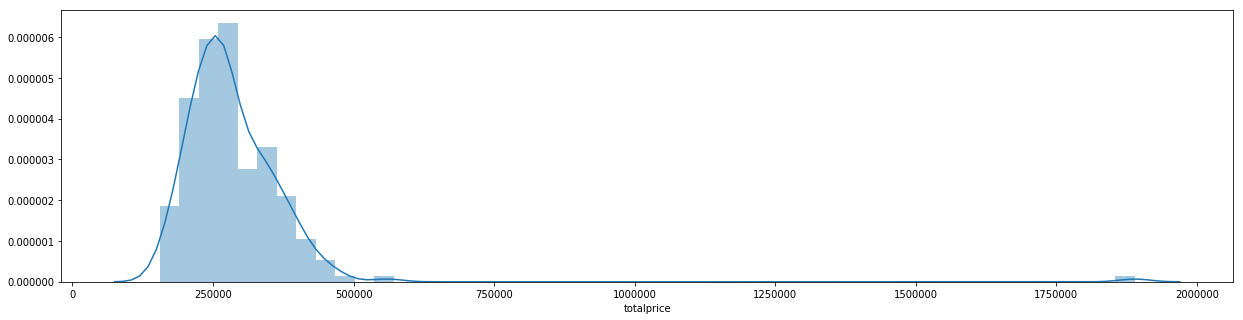

In [27]:
# Univariate Analysis Price
plt.figure(figsize=(21,5))
sns.distplot(df['totalprice'])
plt.show()

> Dikarenakan akan meramalkan harga apartemen di Victoria berdasarkan lingkungan ruang keluarga dan status konservasi apartemen, maka visualisasi data yang perlu dilakukan yaitu mengetahui distribusi data harga apartemen terlebih dahulu. Berdasarkan Density Plot maka dapat diketahui bahwa harga aprtemen memiliki distribusi dengan membentuk pola "Right Skewness". Hal ini menunjukkan bahwa harga apartemen memusat. Jika dilihat berdasarkan plot, dapat diketahui harga memusat pada harga 250.000.

Untuk mengetahui hubungan harga apartemen dengan variabel lainnya maka dapat menggunakan Nilai Korelasi dan *Correlation Plot* sebagai berikut.

In [35]:
df.corr()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
totalprice,1.000000,-0.189643,-0.075187,0.003118,0.200678,0.312584,0.248644,0.153959,0.172438
area,-0.189643,1.000000,-0.140286,-0.017649,-0.275234,-0.275006,-0.177064,-0.000032,0.003843
age,-0.075187,-0.140286,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.003118,-0.017649,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.200678,-0.275234,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.312584,-0.275006,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.248644,-0.177064,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.153959,-0.000032,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
tras,0.172438,0.003843,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


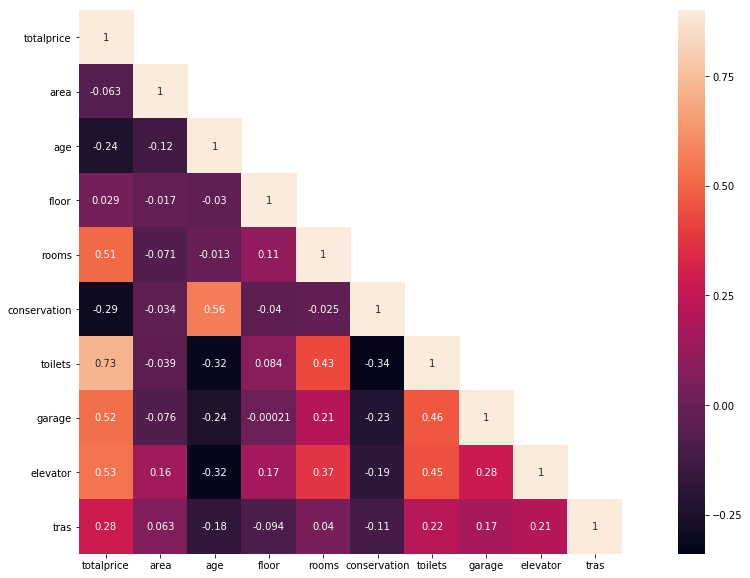

In [116]:
plt.figure(figsize=(5,5))
#create correlation
corr = df.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)
plt.show()

> Berdasarkan nilai korelasi, maka dapat diketahui bahwa variabel-veriabel berikut memiliki hubungan terhadap harga Apartemen di Victoria :
- Negatif (Luas dan Usia)
- Positif (Lokasi Lantai, Jumlah Ruangan, Jumlah Toilet, Jumlah Garasi, Elevator [Dapat di akses atau tidak] & Tras)

> Berdasarkan nilai korelasi maka dapat diketahu bahwa variabel jumlah toilet sangat mempengaruhi harga apartemen dnegan nilai korelasi 31%.

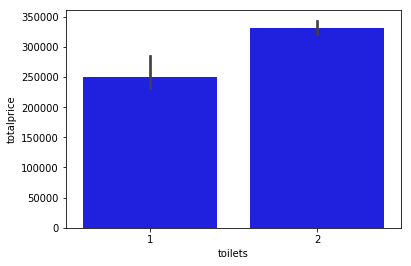

In [38]:
#Bivariate Analysis antara totalprice dan Jumlah Toilet
sns.barplot(data=df, x=df['toilets'], y=df['totalprice'], color='blue')
plt.show()

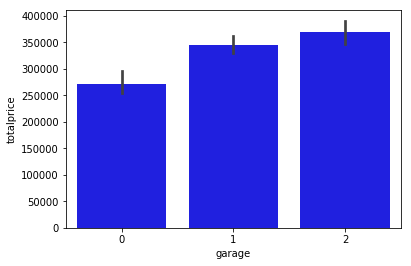

In [44]:
#Bivariate Analysis antara totalprice dan garage
sns.barplot(data=df, x=df['garage'], y=df['totalprice'], color='blue')
plt.show()

> Untuk melihat lebih jelas apakah jumlah toilet benar-benar menjadikan harga apartemen meningkat dapat dilihat berdasarkan plot di atas. Dan jika dilihat plot plot antara harga apartemen dan garage juga menunjukkan semakin banyak jumlah garasi maka semakin tinggi pula harga apartemen. Secara umum, semakin banyak fasilitas yang ada maka harga apartemen juga akan semakin tinggi (mahal).

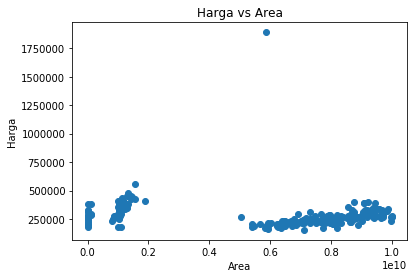

In [45]:
plt.scatter(x=df['area'],y=df['totalprice'])
plt.title('Harga vs Area')
plt.xlabel('Area')
plt.ylabel('Harga')
plt.show()

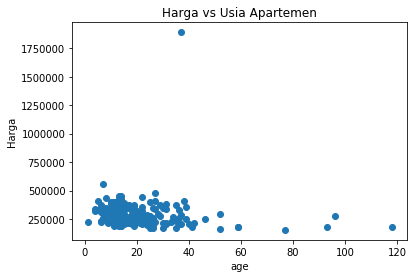

In [47]:
plt.scatter(x=df['age'],y=df['totalprice'])
plt.title('Harga vs Usia Apartemen')
plt.xlabel('age')
plt.ylabel('Harga')
plt.show()

> Jika dilihathubungan antara variabel numerik dengan harga apartemen, menunjukkan adanya harga yang sangat tinggi pada saat kira-kira luas apartemen sama dengan enam dan usia apartemen adalah 40 tahun. Kedua variabel menunjukkan hubungan negatif terhadap harga penjualan apartemen, sehingga menunjukkan semakin kecil ruangan ataupun usia apartemen maka harga apartemen akan semakin tinggi.

# 4.Variable Selection

Variabel yang digunakan dalam melakukan analisis yaitu keseluruhan variabel numerik dan data conservation yang sudah di convert menjadi data numerik. Data numerik digunakan karena metode yang akan digunakan yaitu metode Regresi Linear, yang pada dasarnya variabel prediktor dan respon merupakan variabel numerik. Tidak hanya itu, hal tersebut dilakukan karena dapat diketahui bahwa korelasi harga apartemen dengan variabel lainnya tidak menunjukkan korelasi yang tinggi (korelasi tertinggi yaitu 31%) atau dapat diketahui korelasi variabel-variabel terhadap harga tidak melebihi 50%. Sehingga dalam melakukan peramalan perlu melakukan prediksi berdasarkan keseluruhan variabel yang tersedia dan sesuai dengan metode yang akan digunakan. Harapannya, semakin lengkap variabel pendukung sebagai variabel prediktor maka prediksi yang dihasilkan harapannya semakin akurat.

In [48]:
# Mengubah nilai conservation
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
df['conservation'] = df['conservation'].replace(dicti)

In [49]:
new_df = df.copy()

In [50]:
#Menghapus Kolol yang Tidak Menjadi Variabel Prediktor
drop = ['zone', 'category', 'out', 'streetcategory', 'heating']
new_df.drop(columns=drop, inplace=True)

In [51]:
#Membuat One Hot Encoding
new_df['conservation'] = pd.Categorical(new_df['conservation'])
new_df = pd.get_dummies(new_df)

# 5. Modelling (Regression) 

Pemodelan yang akan dilakukan dalam analisis yaitu dengan menggunakan regresi. 

In [89]:
# Package Regresi Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [90]:
# Memakai Linear regression
lin_reg = LinearRegression()

In [91]:
# Membuat variabel Prediktor (x) dan Respon (y)
x = new_df.drop(columns = ['totalprice'])
y = new_df['totalprice']

In [92]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [93]:
# Training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
# Melakukan Prediksi
y_pred = lin_reg.predict(x_test)

In [114]:
y_pred

array([264812.66526759, 223708.2291267 , 390966.74307055, 420062.56844252,
       361474.52390826, 220945.07331952, 298791.18943153, 317888.8072581 ,
       290378.08970825, 255343.59970656, 250302.84168726, 279589.75607612,
       290827.4351958 , 234693.01567378, 180123.25382249, 314161.20835131,
       204549.93571308, 222042.87840881, 235646.03780908, 336144.2150086 ,
       266051.33763817, 269291.66880199, 252033.89709024, 211419.41516283,
       179674.59872326, 182387.26291072, 292482.12998352, 243495.78640484,
       230312.76042902, 306056.50378443, 327935.77306961, 377570.09430421,
       353184.90932175, 280435.2408231 , 267521.7034173 , 350022.37538112,
       225533.51105449, 341464.41194577, 226971.9965338 , 294091.12091015,
       318183.86402364, 288320.68365064, 288298.34395982, 339185.846225  ])

In [110]:
# Nilai Prediksi vs Aktual
df_test = pd.DataFrame(y_test, y_pred)
df_test

,totalprice
264812.665268,NaN
223708.229127,NaN
390966.743071,NaN
420062.568443,NaN
361474.523908,NaN
220945.073320,NaN
298791.189432,NaN
317888.807258,NaN
290378.089708,NaN
255343.599707,NaN


# 6. Accuracy of Error

Pemodelan yang dilakukan menggunakan data traning. Setelah mendapatkan model, maka untuk mengetahui apakah model yang diperoleh sudah cukup baik dalam melakukan prediksi harga dapat dilihat berdasarkan perhitungan MAE *(Mean Absolute Error)* dan MAPE *(Mean Absolute Percentage Error)* pada data testing. Dapat diketahui, semakin kecil niali MAE maupun MAPE dapat dikethui semakin baik model yang diperoleh.

In [112]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 44346.688605480704
Nilai MAPE 18.393912598674277)


Berdasarkan hasil maka dapat diketahui nilai MAPE sebesar 13. Jika ingin mengetahui apakah model dapat dikatakan sudah cukup baik, dapat dibandingkan dengan menggunakan metode lainnya. Dan memabndingkan kedua nilai tersebut.